---
layout: default
title: "Deep Learning"
categories: deeplearning
permalink: /ML24/
order: 24
comments: true
---

In [1]:
%pylab --no-import-all inline
import pandas as pd
from copy import deepcopy as cp
from graphviz import Digraph
from plot_ann import ann

Populating the interactive namespace from numpy and matplotlib


# Deep learning
While the concept of deep learning has been around since many years, it really took off some years ago. On one hand, from the advent of computers and internet we ha started to accumulate an enormous amount of data. On the other hand computational power has increased to the point that training very large neural network is now not only possible, but relatively easy. These two fact combined are the reason behind the popularization of deep learning algorithm, since large amount of data (more precisely labeled data) fed into very large neural networks, produce results unachievable by other models.

So in one word **scale** has been driving deep learning, scale of labeled data, of computational power and of the algorithm.

Incidentally many new technologies (i.e. types of neural networks) have been invented while trying to run large algorithms faster: for example, one of the fundamental breakthrough in ML has been switching from a sigmoid function to a RELU function (<a href="#sigmoidrelu">figure below</a>). This is due to the fact that in the regions far from $0$, the parameters change very slowly, while with the ReLU the gradient descent is much more efficient.

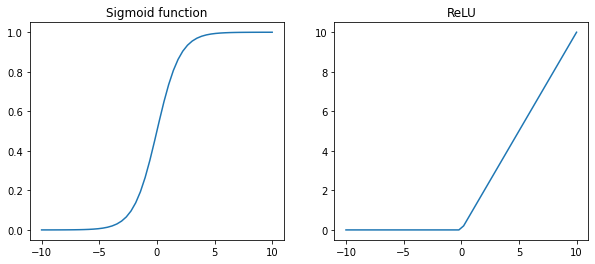

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes

x = np.linspace(-10, 10)
ax1.plot(x, 1/(1 + np.exp(-x)))
ax1.set_title('Sigmoid function')
ax2.plot(x, np.maximum(x, 0))
ax2.set_title('ReLU');

<i id="sigmoidrelu">Comparison between sigmoid function and ReLU</i>

## Notation
Let's take the deep neural network in <a href=#deepann>the figure below</a>

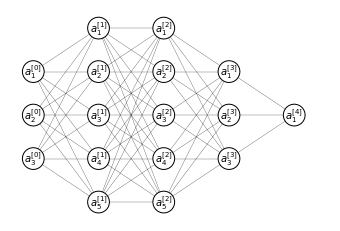

In [3]:
ax, *_ = ann([3, 5, 5, 3, 1], width=1.5, radius=2, node_labels=True)
ax.set_aspect('equal')

# The next section will be moved among the first sections
## Derivatives
Suppose we have a function $f(a) = 3a$, then $f(2) = 6$. If we take a small increment of $a$ ($a'$) we will have $f(2.001) = 6.003$. Connecting $a$ and $a'$ forms a triangle, with an height ($a'-a$) and a width ($f(a') - f(a)$) (<a href="#derivative">figure below</a>).

The slope $\frac{\text{height} }{\text{width}}=3$ so we say that the derivative of $f(a)$ at the point $a=2$ is $3$. Height and width are the the vertical and horizontal distances and the slope is also expressed as $\frac{df(a)}{da}$ or as $\frac{d}{da}f(a)$. The reason why $a'$ doesn't appear in this representation is because, formally, the derivative is calculated at a very small increment of $a$ such as $a' \approx a$.

For a straight line (<a href="#derivative">figure below</a>, panel A) the derivative is constant along the whole line.

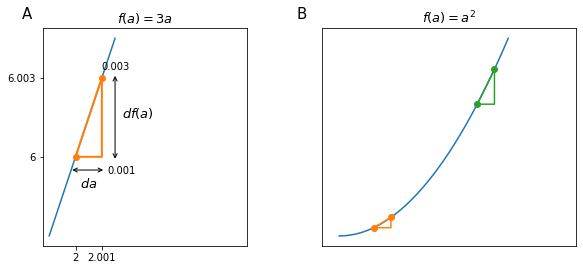

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax, ax2 = axes
xmax = 5
x = np.linspace(0, xmax)
y = 3*x
ax.plot(x, y)
ax.set_aspect('equal')
ax.set_xlim(-xmax*.1, xmax*3)
ax.plot([2, 4, 4, 2], [6, 12, 6, 6], marker='o', lw=2, markevery=[0, 1])

ax.set_xticks([2, 4])
ax.set_xticklabels([2, 2.001])
ax.set_yticks([6, 12])
ax.set_yticklabels([6, 6.003])
ax.set_xlabel('')
ax.annotate('0.001', (1.6, 5), xytext=(4.4, 5), va='center',  arrowprops={'arrowstyle': '<->'})
ax.annotate('0.003', (5, 5.7), xytext=(5, 12.6), ha='center',  arrowprops={'arrowstyle': '<->'});
ax.text(5.5, 9, '$df(a)$', fontsize=13)
ax.text(3, 4.5, '$da$', va='top', ha='center', fontsize=13)
ax.set_title('$f(a)=3a$', fontsize=13)
ax.text(-0.1, 1.1, 'A', transform=ax.transAxes,
  fontsize=15, va='top')

ax2.plot(x, x**2)
ax2.set_xlim(-xmax*.1, xmax*1.4)

x1, x2 = 10, 15
dx = np.r_[x[[x1, x2]], x[x2], x[x1]]
dy = np.r_[x[[x1, x2]], x[x1], x[x1]]**2
ax2.plot(dx, dy, marker='o', markevery=[0, 1])

x1, x2 = 40, 45
dx = np.r_[x[[x1, x2]], x[x2], x[x1]]
dy = np.r_[x[[x1, x2]], x[x1], x[x1]]**2
ax2.plot(dx, dy, marker='o', markevery=[0, 1])
ax2.set_title('$f(a)=a^2$', fontsize=13)
ax2.set_xticks([])
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.text(-0.1, 1.1, 'B', transform=ax2.transAxes,
  fontsize=15, va='top');

<i id="derivative">The concept of derivative applied to a straight line (A), where the derivative is constant along the whole length of the function; and to a non-linear function (B), where the derivative changes based on the value of $a$.</i>

## Computational graph
The computational graph explains the forward- and backward- propagation (as to say the flow of the computation) that takes place in the training of a neural network. 

To illustrate the computation graph let's use a simpler example than a full blown neural network, let's say that we are writing a function $J(a, b, c) = 3(a+bc)$. In order to compute this function there are three steps: 

1. $u = bc$
2. $v = a + u$
3. $J=3v$

We can draw these steps in a computational graph

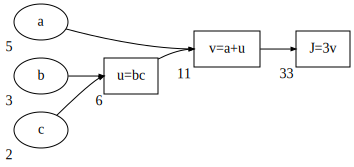

In [5]:
# Create Digraph object
dot = Digraph(edge_attr={'arrowsize': '0.5', 'headport':'w'})

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('a', xlabel='5', xlp='1,3')
    s.node('b', xlabel='3')
    s.node('c', xlabel='2')

with dot.subgraph() as s:
    s.node('u', label='u=bc', shape='rect', xlabel='6')
    s.node('v', label='v=a+u', shape='rect', xlabel='11')
    s.node('j', label='J=3v', shape='rect', xlabel='33')

# Add edge between 1 and 2
dot.edges(['bu', 'av', 'cu', 'uv', 'vj'])
dot.attr(rankdir='LR')
dot

Suppose we want to calculate $\frac{dJ}{dv}$ ( in other words if we change the value $v$ of a little amount how would the value of $J$ change?). 

* $J = 3v$
* $v = 11 \to 3.001$
* $J = 33 \to 33.003$

So 

$$\frac{dJ}{dv}=\frac{0.003}{0.001}=3$$

In the terminology of backpropagation if we want to compute $\frac{dJ}{dv}$ we take one step back from $J$ to $v$

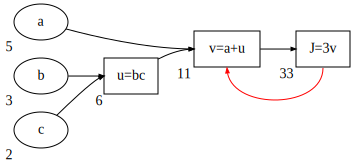

In [6]:
dot2 = cp(dot)
dot2.edge('j', 'v', headport='s', tailport='s', color='red')
dot2

We now want to calculate $\frac{dJ}{da}$, in other words the change of value $J$ when $a$ changes

* $a = 5 \to 5.001$
* $v = 11 \to 11.001$
* $J = 33 \to 33.003$

So, once again

$$\frac{dJ}{da}=\frac{0.003}{0.001}=3$$

Where the net change is given by 

$$
\frac{dJ}{da}=\frac{dJ}{dv}\frac{dv}{da}
$$


In calculus this is called the **chain rule** where $a$ affects $v$ that affects $J$ ($a\to v \to J$). So that the change of $J$ when $a$ is given by the product $\frac{dJ}{dv}\frac{dv}{da}$. This illustrates how having computed $\frac{dJ}{dv}$ helps in calculating $\frac{dJ}{da}$

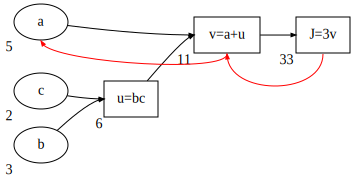

In [7]:
dot3 = cp(dot2)
dot3.edge('v', 'a', headport='s', tailport='s', color='red')
dot3